# 데이터 전처리

## 0.환경준비

### 0.1 Import

In [36]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Data Loading

In [37]:
# titanic
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv'
# usecols 사용할 column만 지정
titanic = pd.read_csv(path, usecols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [38]:
# airquality
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


## 1.전처리

### 1) 데이터 분할

* x, y 분할하기

In [39]:
target = 'Survived'
x = titanic.drop(target, axis = 1)
y = titanic.loc[:, target]

* train, validation, test 분할은 머신러닝 과정에서 다룹니다.

### 2) NaN 조치

#### ① 결측치 확인

In [40]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

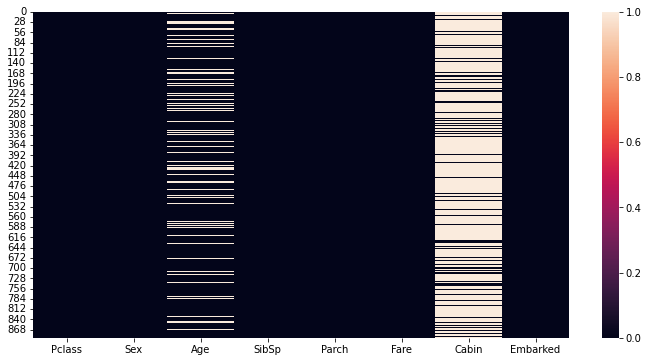

In [41]:
plt.figure(figsize = (12,6))
sns.heatmap(x.isna())
plt.show()

#### ② 결측치 제거

In [42]:
temp = x.copy()

In [43]:
temp.shape

(891, 8)

In [44]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


* 행 제거

In [45]:
temp.dropna(axis = 0, inplace = True)
temp.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [46]:
temp.shape

(183, 8)

* 열 제거

In [47]:
# x에서 Cabin 열을 삭제합시다.
x = x.drop('Cabin', axis = 1)

# 행,열의 수를 확인하시오.
x.shape

(891, 7)

#### ③ 결측치 채우기

* .fillna
    * 단일값 : .fillna(0)
    * 이전 값, 이후 값 : .fillna(method = 'ffill'),  method = 'bfill'

In [48]:
air

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
...,...,...,...,...,...
148,30,193.0,6.9,70,1973-09-26
149,23,145.0,13.2,77,1973-09-27
150,14,191.0,14.3,75,1973-09-28
151,18,131.0,8.0,76,1973-09-29


In [49]:
temp = air.copy()
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
5,28,NaN,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


* 단일값으로 채우기

In [50]:
# 단일값으로 채우는 것처럼 조회
temp.fillna(0).head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,0.0,14.3,56,1973-05-05
5,28,0.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [51]:
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
5,28,NaN,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [52]:
# 단일값으로 진짜 채우기
# temp.fillna(0)
temp.fillna(0, inplace = True)
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,0.0,14.3,56,1973-05-05
5,28,0.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


* 이전값, 이후값으로 채우기

In [53]:
temp = air.copy()

In [54]:
# 이전 값으로 채우기
temp.fillna(method = 'ffill').head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,313.0,14.3,56,1973-05-05
5,28,313.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [55]:
# 이후 값으로 채우기
temp.fillna(method = 'bfill').head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,299.0,14.3,56,1973-05-05
5,28,299.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


* 전,후 사이값으로 채우기 
    * .interpolate(method = 'linear')

In [56]:
temp.interpolate(method = "linear").head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.000000,7.4,67,1973-05-01
1,36,118.000000,8.0,72,1973-05-02
2,12,149.000000,12.6,74,1973-05-03
3,18,313.000000,11.5,62,1973-05-04
4,19,308.333333,14.3,56,1973-05-05
5,28,303.666667,14.9,66,1973-05-06
6,23,299.000000,8.6,65,1973-05-07


* x 에서 값 채우기
    * Age에 대해 평균값으로, x['Age'].mean()
    * Embarked에 대해 최빈값으로 채워 봅시다. x['Embarked'].mode()

In [57]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [58]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [59]:
x['Age'].mean()

In [60]:
x['Age'] = x['Age'].fillna(x['Age'].mean())
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [61]:
x['Embarked'].mode()

0    S
dtype: object

In [62]:
type(x['Embarked'].mode())

pandas.core.series.Series

In [63]:
x['Embarked'] = x['Embarked'].fillna(x['Embarked'].mode()[0])
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 3) 가변수화

* 모델링을 위해서 모든 데이터 값은 숫자 여야 합니다.
* 숫자 형식이 아니라 의미상 숫자
    * 타이타닉 데이터의 pclass(객실등급)가 1,2,3 입니다. 이는 숫자 형식이지만 숫자의 의미는 아닙니다. (3등급 객실의 3이 1등급 객실의 1에 3배의 의미는 아니라는 말입니다.)
* 그러므로 모든 범주형 변수는 모두 (이미 0,1로 되어 있는 변수를 빼고) 가변수화를 수행해야 합니다.

In [64]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [65]:
col_dumm = ['Pclass', 'Sex', 'Embarked']
x = pd.get_dummies(x, columns = col_dumm, drop_first = True)
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


* drop_first = True : 가변수화 시, 첫번째 범주 열은 삭제. ==> 하나를 빼도 모든 범주 표현 가능.

### 4) 스케일링

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

* 정규화(Normalization, MinMax 방식)
    * 모든 값을 0 ~ 1 로.

In [67]:
# 선언하기
scaler = MinMaxScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x1 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x1 = pd.DataFrame(x1, columns = list(x))
x1.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.0,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.0,0.015713,0.0,1.0,1.0,0.0,1.0


* 표준화(Standardization)
    * 평균은 0, 표준편차 1 로

In [68]:
# 선언하기
scaler = StandardScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x2 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x2 = pd.DataFrame(x2, columns = list(x))
x2.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,-0.510152,0.902587,0.737695,-0.307562,0.615838
1,0.638789,0.432793,-0.473674,0.786845,-0.510152,-1.107926,-1.355574,-0.307562,-1.623803
2,-0.284663,-0.474545,-0.473674,-0.488854,-0.510152,0.902587,-1.355574,-0.307562,0.615838
3,0.407926,0.432793,-0.473674,0.420730,-0.510152,-1.107926,-1.355574,-0.307562,0.615838
4,0.407926,-0.474545,-0.473674,-0.486337,-0.510152,0.902587,0.737695,-0.307562,0.615838


In [ ]:
# 가변수화한 데이터의 표준편차는 필요하지 않으므로 다시 만듬
# 선언하기
scaler = StandardScaler()
ss_list = ['Age', 'SibSp', 'Parch', 'Fare']

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x2 = scaler.fit_transform(x[ss_list])
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x2 = pd.DataFrame(x2, columns = ss_list)
x2.head()

* 값들을 살펴봅시다.

In [69]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.206510,0.551066,0.647587,0.086420,0.725028
std,13.002015,1.102743,0.806057,49.693429,0.405028,0.497665,0.477990,0.281141,0.446751
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
x1.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.065376,0.063599,0.062858,0.206510,0.551066,0.647587,0.086420,0.725028
std,0.163383,0.137843,0.134343,0.096995,0.405028,0.497665,0.477990,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.434531,0.125000,0.000000,0.060508,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
x2.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,1.413011e-16,-2.925706e-16,-4.059603e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.101515e-01,-1.107926e+00,-1.355574e+00,-3.075623e-01,-1.623803e+00
25%,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.101515e-01,-1.107926e+00,-1.355574e+00,-3.075623e-01,-1.623803e+00
50%,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.101515e-01,9.025874e-01,7.376951e-01,-3.075623e-01,6.158384e-01
75%,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-5.101515e-01,9.025874e-01,7.376951e-01,-3.075623e-01,6.158384e-01
max,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.960202e+00,9.025874e-01,7.376951e-01,3.251373e+00,6.158384e-01


-----

# 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 데이터 분석을 위한 전처리를 수행해 봅시다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature|
|	Income 	|	 지역 주민 평균소득(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 10~17)	|	feature	|


## 0.환경준비

### 0.1 Import

In [72]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Data Loading

In [73]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


## 1.데이터 탐색

* 기초 통계량
    * .describe()
    * 시리즈 혹은 데이터프레임에 붙여서 사용하는 메서드.
    * .T : transpose. 행/열 위치를 바꿈.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        300 non-null    float64
 1   CompPrice    287 non-null    float64
 2   Income       288 non-null    float64
 3   Advertising  300 non-null    int64  
 4   Population   300 non-null    int64  
 5   Price        300 non-null    int64  
 6   ShelveLoc    300 non-null    object 
 7   Age          300 non-null    int64  
 8   Education    300 non-null    int64  
 9   Urban        300 non-null    object 
 10  US           300 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 25.9+ KB


In [75]:
#data.describe().T
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,300.000000,287.000000,288.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,7.441867,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,13.906667
std,2.928141,14.551674,28.558597,6.569413,148.112339,22.149653,16.377098,2.601380
min,0.000000,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,10.000000
25%,5.357500,116.000000,42.000000,0.000000,136.250000,101.000000,39.000000,12.000000
50%,7.260000,125.000000,69.000000,5.000000,278.000000,117.000000,54.000000,14.000000
75%,9.352500,135.000000,93.000000,11.000000,400.000000,131.000000,65.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [77]:
data['ShelveLoc'].unique()

array(['Bad', 'Medium', 'Good'], dtype=object)

In [79]:
data['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [80]:
data['US'].unique()

array(['Yes', 'No'], dtype=object)

* 진열상태 별 판매량 조회

In [81]:
data.groupby('ShelveLoc', as_index = False)['Sales'].mean()

,ShelveLoc,Sales
0,Bad,5.407432
1,Good,10.439194
2,Medium,7.226707


## 2.데이터 전처리 

In [82]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [83]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치

In [84]:
x.isna().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [86]:
from sklearn.impute import SimpleImputer

In [87]:
# 선언
imputer = SimpleImputer(strategy='mean')

# 대상 리스트
impute_list = ['CompPrice', 'Income']

# 피팅하고 적용하기
x[impute_list] = imputer.fit_transform(x[impute_list])
x.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [88]:
x['Education'].unique()

array([13, 12, 10, 16, 11, 18, 17, 14, 15], dtype=int64)

In [89]:
dum_cols = ['ShelveLoc','US','Urban','Education']

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,139.0,111.000000,5,310,132,62,0,0,1,1,0,0,1,0,0,0,0,0
1,143.0,21.000000,5,81,160,67,0,1,1,0,0,1,0,0,0,0,0,0
2,114.0,68.673611,0,97,125,29,0,1,0,1,0,1,0,0,0,0,0,0
3,119.0,88.000000,10,170,101,61,0,1,1,1,0,0,1,0,0,0,0,0
4,136.0,81.000000,15,425,120,67,1,0,1,1,0,0,0,0,0,0,0,0


### 2.4 스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

* MinMaxScaler

In [90]:
list(x)

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'US_Yes',
 'Urban_Yes',
 'Education_11',
 'Education_12',
 'Education_13',
 'Education_14',
 'Education_15',
 'Education_16',
 'Education_17',
 'Education_18']

In [95]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

# 데이터프레임으로 다시 만듭시다.
x_s = pd.DataFrame(x_s, columns=col_x)
x_s.head()


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.595506,0.909091,0.172414,0.599598,0.584507,0.672727,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.640449,0.000000,0.172414,0.138833,0.781690,0.763636,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.314607,0.481552,0.000000,0.171026,0.535211,0.072727,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.370787,0.676768,0.344828,0.317907,0.366197,0.654545,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.561798,0.606061,0.517241,0.830986,0.500000,0.763636,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
x.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,0.206667,0.546667,0.650000,0.696667,0.120000,0.143333,0.093333,0.110000,0.080000,0.120000,0.126667,0.096667
std,14.231818,27.979646,6.569413,148.112339,22.149653,16.377098,0.405591,0.498649,0.477767,0.460466,0.325504,0.350998,0.291385,0.313413,0.271746,0.325504,0.333155,0.295997
min,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.750000,42.000000,0.000000,136.250000,101.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.344948,68.673611,5.000000,278.000000,117.000000,54.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,92.000000,11.000000,400.000000,131.000000,65.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
x_s.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.442078,0.481552,0.227586,0.512978,0.471338,0.508424,0.206667,0.546667,0.650000,0.696667,0.120000,0.143333,0.093333,0.110000,0.080000,0.120000,0.126667,0.096667
std,0.159908,0.282623,0.226531,0.298013,0.155983,0.297765,0.405591,0.498649,0.477767,0.460466,0.325504,0.350998,0.291385,0.313413,0.271746,0.325504,0.333155,0.295997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345506,0.212121,0.000000,0.250000,0.366197,0.254545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.442078,0.481552,0.172414,0.535211,0.478873,0.527273,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.539326,0.717172,0.379310,0.780684,0.577465,0.727273,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* StandardScaler

In [99]:
from sklearn.preprocessing import StandardScaler
col_x = list(x)
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

# 데이터프레임으로 다시 만듭시다.
x_s = pd.DataFrame(x_s, columns=col_x)
x_s.head()


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.961077,1.515284,-0.243960,0.291143,0.726731,0.552709,-0.510396,-1.098127,0.733799,0.659854,-0.369274,-0.409042,3.116775,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
1,1.242607,-1.706714,-0.243960,-1.257564,1.992972,0.858523,-0.510396,0.910642,0.733799,-1.515488,-0.369274,2.444738,-0.320844,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
2,-0.798486,0.000000,-1.006335,-1.149357,0.410171,-1.465667,-0.510396,0.910642,-1.362770,0.659854,-0.369274,2.444738,-0.320844,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
3,-0.446573,0.691884,0.518415,-0.655664,-0.675177,0.491546,-0.510396,0.910642,0.733799,0.659854,-0.369274,-0.409042,3.116775,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
4,0.749929,0.441285,1.280789,1.068878,0.184057,0.858523,1.959263,-1.098127,0.733799,0.659854,-0.369274,-0.409042,-0.320844,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125


In [100]:
x.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,0.206667,0.546667,0.650000,0.696667,0.120000,0.143333,0.093333,0.110000,0.080000,0.120000,0.126667,0.096667
std,14.231818,27.979646,6.569413,148.112339,22.149653,16.377098,0.405591,0.498649,0.477767,0.460466,0.325504,0.350998,0.291385,0.313413,0.271746,0.325504,0.333155,0.295997
min,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.750000,42.000000,0.000000,136.250000,101.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.344948,68.673611,5.000000,278.000000,117.000000,54.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,92.000000,11.000000,400.000000,131.000000,65.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
x_s.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,9.747758e-16,-8.798517e-17,8.067621e-17,6.254256e-17,-3.160435e-16,1.465494e-16,2.486900e-16,4.181840e-16,-7.031412e-17,-1.842970e-16,-9.584925e-17,7.697546e-17,1.084318e-16,-2.775558e-17,-6.069219e-17,8.104628e-17,2.127927e-17,6.217249e-17
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-2.769196e+00,-1.706714e+00,-1.006335e+00,-1.724205e+00,-3.026767e+00,-1.710319e+00,-5.103961e-01,-1.098127e+00,-1.362770e+00,-1.515488e+00,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
25%,-6.049338e-01,-9.549148e-01,-1.006335e+00,-8.839127e-01,-6.751774e-01,-8.540380e-01,-5.103961e-01,-1.098127e+00,-1.362770e+00,-1.515488e+00,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
50%,1.000195e-15,0.000000e+00,-2.439599e-01,7.473019e-02,4.838847e-02,6.340554e-02,-5.103961e-01,9.106417e-01,7.337994e-01,6.598535e-01,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
75%,6.091642e-01,8.350843e-01,6.708897e-01,8.998056e-01,6.815086e-01,7.361974e-01,-5.103961e-01,9.106417e-01,7.337994e-01,6.598535e-01,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
max,3.494846e+00,1.837484e+00,3.415438e+00,1.636963e+00,3.394881e+00,1.653641e+00,1.959263e+00,9.106417e-01,7.337994e-01,6.598535e-01,2.708013e+00,2.444738e+00,3.116775e+00,2.844452e+00,3.391165e+00,2.708013e+00,2.625783e+00,3.056931e+00


-----

# 이동통신 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 분석을 위한 데이터 전처리를 수행해 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [339]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	OVER_15MINS_CALLS_PER_MONTH	|	 평균 장기통화(15분 이상) 횟수	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	REPORTED_USAGE_LEVEL	|	사용 수준 설문('very_little', 'little', 'avg', 'high', 'very_high') - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18000 non-null  int64  
 1   COLLEGE                      18000 non-null  int64  
 2   INCOME                       18000 non-null  int64  
 3   OVERAGE                      18000 non-null  int64  
 4   LEFTOVER                     18000 non-null  int64  
 5   HOUSE                        17785 non-null  float64
 6   HANDSET_PRICE                18000 non-null  int64  
 7   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 8   AVERAGE_CALL_DURATION        18000 non-null  int64  
 9   REPORTED_SATISFACTION        17962 non-null  object 
 10  REPORTED_USAGE_LEVEL         18000 non-null  object 
 11  CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
 12  CHURN                        18000 non-null  int64  
dtypes: float64(1), i

### 2.1 데이터 feature와 , target으로 분할

In [341]:
target = 'CHURN'
x = data.drop([target, 'id'], axis=1)
y = data.loc[:, target]

In [342]:
x

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no
...,...,...,...,...,...,...,...,...,...,...,...
17995,0,31079,200,40,NaN,181,20,11,unsat,little,actively_looking_into_it
17996,0,137194,63,0,NaN,787,3,11,very_unsat,little,no
17997,0,82931,0,77,NaN,232,0,2,very_unsat,very_little,never_thought
17998,0,124391,0,19,NaN,862,0,2,unsat,very_high,no


In [343]:
y

0        0
1        1
2        0
3        0
4        1
        ..
17995    0
17996    1
17997    0
17998    0
17999    1
Name: CHURN, Length: 18000, dtype: int64

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* **조치방법을 결정한 이유**를 주석으로 기술합니다.

In [344]:
x.isna().sum()

COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

In [345]:
x['REPORTED_SATISFACTION'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
17995    False
17996    False
17997    False
17998    False
17999    False
Name: REPORTED_SATISFACTION, Length: 18000, dtype: bool

In [296]:
x = x.dropna(axis=0)

In [336]:
x.isna().sum()
x

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN


In [301]:
x = x.reset_index(drop=True)

In [302]:
x

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no
...,...,...,...,...,...,...,...,...,...,...,...
17742,0,46760,230,0,552976.0,224,19,11,very_unsat,very_high,actively_looking_into_it
17743,1,50889,29,40,199087.0,332,4,2,very_unsat,very_little,actively_looking_into_it
17744,1,106809,43,6,199932.0,436,4,5,very_unsat,high,no
17745,0,75906,48,62,363613.0,372,3,2,very_sat,very_little,considering


In [262]:
#x['HOUSE'].mean()

In [263]:
#x['HOUSE'] = x['HOUSE'].fillna(x['HOUSE'].mean())

In [264]:
#x.isna().sum()

In [323]:
x['REPORTED_SATISFACTION'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
17742    False
17743    False
17744    False
17745    False
17746    False
Name: REPORTED_SATISFACTION, Length: 17747, dtype: bool

In [324]:
x['REPORTED_SATISFACTION'].mode()

0    very_unsat
dtype: object

In [ ]:
# x['REPORTED_SATISFACTION'] = x['REPORTED_SATISFACTION'].fillna(x['REPORTED_SATISFACTION'].mode()[0])

In [266]:
#x['REPORTED_SATISFACTION'] = x['REPORTED_SATISFACTION'].dropna(axis=0)

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [303]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17747 entries, 0 to 17746
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COLLEGE                      17747 non-null  int64  
 1   INCOME                       17747 non-null  int64  
 2   OVERAGE                      17747 non-null  int64  
 3   LEFTOVER                     17747 non-null  int64  
 4   HOUSE                        17747 non-null  float64
 5   HANDSET_PRICE                17747 non-null  int64  
 6   OVER_15MINS_CALLS_PER_MONTH  17747 non-null  int64  
 7   AVERAGE_CALL_DURATION        17747 non-null  int64  
 8   REPORTED_SATISFACTION        17747 non-null  object 
 9   REPORTED_USAGE_LEVEL         17747 non-null  object 
 10  CONSIDERING_CHANGE_OF_PLAN   17747 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 1.5+ MB


In [304]:
columns = ['COLLEGE', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
dummy_x = pd.get_dummies(x[columns], drop_first = 1)
dummy_x

,COLLEGE,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17742,0,0,0,0,1,0,0,1,0,0,0,0,0
17743,1,0,0,0,1,0,0,0,1,0,0,0,0
17744,1,0,0,0,1,1,0,0,0,0,0,1,0
17745,0,0,0,1,0,0,0,0,1,1,0,0,0


In [305]:
x2 = pd.concat([x, dummy_x], axis=1)
x2

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,...,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1,47711,183,17,730589.0,192,19,5,unsat,little,...,0,0,0,1,0,0,1,0,0,0
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,...,0,0,0,0,0,1,0,0,1,0
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,...,0,0,0,0,1,0,1,0,0,0
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,...,0,1,0,0,1,0,0,1,0,0
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17742,0,46760,230,0,552976.0,224,19,11,very_unsat,very_high,...,0,1,0,0,1,0,0,0,0,0
17743,1,50889,29,40,199087.0,332,4,2,very_unsat,very_little,...,0,1,0,0,0,1,0,0,0,0
17744,1,106809,43,6,199932.0,436,4,5,very_unsat,high,...,0,1,1,0,0,0,0,0,1,0
17745,0,75906,48,62,363613.0,372,3,2,very_sat,very_little,...,1,0,0,0,0,1,1,0,0,0


In [306]:
x2 = x2.drop(columns=columns, axis=1)
x2.head(5)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,47711,183,17,730589.0,192,19,5,0,1,0,0,0,1,0,0,1,0,0,0
1,74132,191,43,535092.0,349,15,2,0,1,0,0,0,0,0,1,0,0,1,0
2,150419,0,14,204004.0,682,0,6,0,1,0,0,0,0,1,0,1,0,0,0
3,159567,0,58,281969.0,634,1,1,0,0,0,1,0,0,1,0,0,1,0,0
4,23392,0,0,216707.0,233,0,15,0,1,0,0,0,0,0,1,0,0,1,0


In [307]:
columns = ['COLLEGE', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x2 = pd.get_dummies(x, columns=columns, drop_first=True)
x2

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE_1,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,47711,183,17,730589.0,192,19,5,1,0,1,0,0,0,1,0,0,1,0,0,0
1,74132,191,43,535092.0,349,15,2,0,0,1,0,0,0,0,0,1,0,0,1,0
2,150419,0,14,204004.0,682,0,6,1,0,1,0,0,0,0,1,0,1,0,0,0
3,159567,0,58,281969.0,634,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,23392,0,0,216707.0,233,0,15,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17742,46760,230,0,552976.0,224,19,11,0,0,0,0,1,0,0,1,0,0,0,0,0
17743,50889,29,40,199087.0,332,4,2,1,0,0,0,1,0,0,0,1,0,0,0,0
17744,106809,43,6,199932.0,436,4,5,1,0,0,0,1,1,0,0,0,0,0,1,0
17745,75906,48,62,363613.0,372,3,2,0,0,0,1,0,0,0,0,1,1,0,0,0


In [308]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17747 entries, 0 to 17746
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   INCOME                                    17747 non-null  int64  
 1   OVERAGE                                   17747 non-null  int64  
 2   LEFTOVER                                  17747 non-null  int64  
 3   HOUSE                                     17747 non-null  float64
 4   HANDSET_PRICE                             17747 non-null  int64  
 5   OVER_15MINS_CALLS_PER_MONTH               17747 non-null  int64  
 6   AVERAGE_CALL_DURATION                     17747 non-null  int64  
 7   COLLEGE_1                                 17747 non-null  uint8  
 8   REPORTED_SATISFACTION_sat                 17747 non-null  uint8  
 9   REPORTED_SATISFACTION_unsat               17747 non-null  uint8  
 10  REPORTED_SATISFACTION_very_sat    

### 2.4 스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [309]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [310]:
scaler = MinMaxScaler()

In [ ]:
x3 = x.drop(columns=columns, axis=1)
x3

In [351]:
scaler.fit(x3)

StandardScaler()

In [352]:
train_x = scaler.transform(x3)

In [353]:
col_name = list(x3)
train_x = pd.DataFrame(train_x, columns=col_name)

In [354]:
train_x.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04
mean,1.419949e-16,3.877867e-16,-1.253091e-16,2.502334e-17,2.275247e-17,-1.169341e-16,-4.240205e-17
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.445531e+00,-1.024159e+00,-8.930592e-01,-1.360377e+00,-1.214612e+00,-8.966662e-01,-1.134296e+00
25%,-9.163381e-01,-1.000892e+00,-8.930592e-01,-9.084147e-01,-7.989885e-01,-7.847674e-01,-9.070527e-01
50%,-1.151481e-01,-3.144952e-01,-3.719428e-01,-1.615462e-01,-2.993062e-01,-4.490708e-01,-2.253227e-01
75%,8.585328e-01,1.081566e+00,6.702899e-01,8.267565e-01,6.813788e-01,7.818165e-01,9.108941e-01
max,1.909513e+00,2.896444e+00,2.419752e+00,2.010712e+00,2.376563e+00,2.348400e+00,2.047111e+00


In [355]:
train_x = pd.concat([train_x, dummy_x], axis = 1)
train_x

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,-0.781502,1.128101,-0.260275,0.942294,-0.925077,1.229412,-0.225323,1,0,1,0,0,0,1,0,0,1,0,0,0
1,-0.148225,1.221172,0.707513,0.166914,-0.191898,0.781817,-0.907053,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1.680276,-1.000892,-0.371943,-1.146246,1.363188,-0.896666,0.001921,1,0,1,0,0,0,0,1,0,1,0,0,0
3,1.899542,-1.000892,1.265852,-0.837021,1.139032,-0.784767,-1.134296,0,0,0,0,1,0,0,1,0,0,1,0,0
4,-1.364397,-1.000892,-0.893059,-1.095863,-0.733609,-0.896666,2.047111,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17742,-0.804296,1.674891,-0.893059,0.237846,-0.775639,1.229412,1.138137,0,0,0,0,1,0,0,1,0,0,0,0,0
17743,-0.705330,-0.663510,0.595845,-1.165747,-0.271287,-0.449071,-0.907053,1,0,0,0,1,0,0,0,1,0,0,0,0
17744,0.635001,-0.500637,-0.669724,-1.162396,0.214386,-0.449071,-0.225323,1,0,0,0,1,1,0,0,0,0,0,1,0
17745,-0.105704,-0.442467,1.414742,-0.513205,-0.084489,-0.560970,-0.907053,0,0,0,1,0,0,0,0,1,1,0,0,0


In [314]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [315]:
scaler = StandardScaler()

In [316]:
x3 = x.drop(columns=columns, axis=1)
x3

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,47711,183,17,730589.0,192,19,5
1,74132,191,43,535092.0,349,15,2
2,150419,0,14,204004.0,682,0,6
3,159567,0,58,281969.0,634,1,1
4,23392,0,0,216707.0,233,0,15
...,...,...,...,...,...,...,...
17742,46760,230,0,552976.0,224,19,11
17743,50889,29,40,199087.0,332,4,2
17744,106809,43,6,199932.0,436,4,5
17745,75906,48,62,363613.0,372,3,2


In [317]:
scaler.fit(x3)

StandardScaler()

In [318]:
train_x =scaler.transform(x3)

In [319]:
col_name = list(x3)
train_x = pd.DataFrame(train_x, columns=col_name)

In [320]:
train_x.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04,1.774700e+04
mean,1.419949e-16,3.877867e-16,-1.253091e-16,2.502334e-17,2.275247e-17,-1.169341e-16,-4.240205e-17
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.445531e+00,-1.024159e+00,-8.930592e-01,-1.360377e+00,-1.214612e+00,-8.966662e-01,-1.134296e+00
25%,-9.163381e-01,-1.000892e+00,-8.930592e-01,-9.084147e-01,-7.989885e-01,-7.847674e-01,-9.070527e-01
50%,-1.151481e-01,-3.144952e-01,-3.719428e-01,-1.615462e-01,-2.993062e-01,-4.490708e-01,-2.253227e-01
75%,8.585328e-01,1.081566e+00,6.702899e-01,8.267565e-01,6.813788e-01,7.818165e-01,9.108941e-01
max,1.909513e+00,2.896444e+00,2.419752e+00,2.010712e+00,2.376563e+00,2.348400e+00,2.047111e+00


In [321]:
train_x

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,-0.781502,1.128101,-0.260275,0.942294,-0.925077,1.229412,-0.225323
1,-0.148225,1.221172,0.707513,0.166914,-0.191898,0.781817,-0.907053
2,1.680276,-1.000892,-0.371943,-1.146246,1.363188,-0.896666,0.001921
3,1.899542,-1.000892,1.265852,-0.837021,1.139032,-0.784767,-1.134296
4,-1.364397,-1.000892,-0.893059,-1.095863,-0.733609,-0.896666,2.047111
...,...,...,...,...,...,...,...
17742,-0.804296,1.674891,-0.893059,0.237846,-0.775639,1.229412,1.138137
17743,-0.705330,-0.663510,0.595845,-1.165747,-0.271287,-0.449071,-0.907053
17744,0.635001,-0.500637,-0.669724,-1.162396,0.214386,-0.449071,-0.225323
17745,-0.105704,-0.442467,1.414742,-0.513205,-0.084489,-0.560970,-0.907053


In [322]:
train_x =pd.concat([train_x, dummy_x], axis=1)
train_x

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,-0.781502,1.128101,-0.260275,0.942294,-0.925077,1.229412,-0.225323,1,0,1,0,0,0,1,0,0,1,0,0,0
1,-0.148225,1.221172,0.707513,0.166914,-0.191898,0.781817,-0.907053,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1.680276,-1.000892,-0.371943,-1.146246,1.363188,-0.896666,0.001921,1,0,1,0,0,0,0,1,0,1,0,0,0
3,1.899542,-1.000892,1.265852,-0.837021,1.139032,-0.784767,-1.134296,0,0,0,0,1,0,0,1,0,0,1,0,0
4,-1.364397,-1.000892,-0.893059,-1.095863,-0.733609,-0.896666,2.047111,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17742,-0.804296,1.674891,-0.893059,0.237846,-0.775639,1.229412,1.138137,0,0,0,0,1,0,0,1,0,0,0,0,0
17743,-0.705330,-0.663510,0.595845,-1.165747,-0.271287,-0.449071,-0.907053,1,0,0,0,1,0,0,0,1,0,0,0,0
17744,0.635001,-0.500637,-0.669724,-1.162396,0.214386,-0.449071,-0.225323,1,0,0,0,1,1,0,0,0,0,0,1,0
17745,-0.105704,-0.442467,1.414742,-0.513205,-0.084489,-0.560970,-0.907053,0,0,0,1,0,0,0,0,1,1,0,0,0
